In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
from lifelines import KaplanMeierFitter
import matplotlib.ticker as mtick

In [3]:
df = pd.read_csv('/Users/cp/Documents/dsi/capstone2/capstone2/data/METABRIC_RNA_Mutation.csv')

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
kmf = KaplanMeierFitter(label="MetaBric Breast Cancer Data")
T = df['overall_survival_months'] 
E = df['overall_survival']
kmf.fit(T,E)


<lifelines.KaplanMeierFitter:"MetaBric Breast Cancer Data", fitted with 1904 total observations, 1103 right-censored observations>

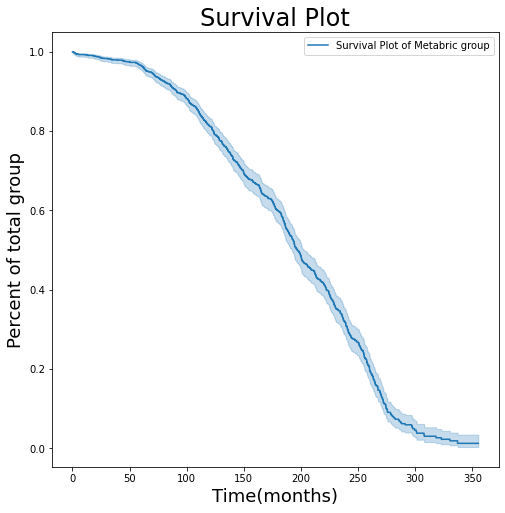

In [75]:
kmf.plot(figsize = (8,8))
plt.xlabel("Time(months)", fontsize = 18)
plt.ylabel("Percent of total group", fontsize = 18)
# fig.suptitle('test title', fontsize=20)

plt.title("Survival Plot", fontsize=24)
plt.savefig("kmf_survival_plt.png", dpi=200)

In [6]:
df.overall_survival


0       1
1       1
2       0
3       1
4       0
       ..
1899    1
1900    0
1901    0
1902    0
1903    0
Name: overall_survival, Length: 1904, dtype: int64

In [7]:
df.overall_survival_months

0       140.500000
1        84.633333
2       163.700000
3       164.933333
4        41.366667
           ...    
1899    196.866667
1900     44.733333
1901    175.966667
1902     86.233333
1903    201.900000
Name: overall_survival_months, Length: 1904, dtype: float64

In [9]:
death_from_dict = {
    'Living':0
    ,'Died of Other Causes':0
    ,'Died of Disease':1
}
df['death_from_cancer'].replace(death_from_dict, inplace =True)

In [10]:
df.death_from_cancer

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
1899    0.0
1900    1.0
1901    1.0
1902    0.0
1903    0.0
Name: death_from_cancer, Length: 1904, dtype: float64

In [11]:
filt = df.death_from_cancer == 1

In [12]:
df_death = df[filt]

In [13]:
df_death


patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
2              5             48.87             MASTECTOMY  Breast Cancer   
4              8             76.97             MASTECTOMY  Breast Cancer   
5             10             78.77             MASTECTOMY  Breast Cancer   
9             35             84.22             MASTECTOMY  Breast Cancer   
10            36             85.49             MASTECTOMY  Breast Cancer   
...          ...               ...                    ...            ...   
1895        7291             53.87             MASTECTOMY  Breast Cancer   
1896        7292             52.90      BREAST CONSERVING  Breast Cancer   
1898        7294             59.20             MASTECTOMY  Breast Cancer   
1900        7296             42.88             MASTECTOMY  Breast Cancer   
1901        7297             62.90             MASTECTOMY  Breast Cancer   

                           cancer_type_detailed cellularity  chemotherapy  \
2              Breast Invasive Ductal Carcinoma        High             1   
4     Breast Mixed Ductal and Lobular Carcinoma        High             1   
5              Breast Invasive Ductal Carcinoma    Moderate             0   
9             Breast Invasive Lobular Carcinoma        High             0   
10             Breast Invasive Ductal Carcinoma    Moderate             0   
...                                         ...         ...           ...   
1895           Breast Invasive Ductal Carcinoma        High             0   
1896           Breast Invasive Ductal Carcinoma        High             0   
1898           Breast Invasive Ductal Carcinoma        High             0   
1900           Breast Invasive Ductal Carcinoma        High             0   
1901           Breast Invasive Ductal Carcinoma        High             0   

     pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
2                           LumB     1.0                   Positve  ...   
4                           LumB     1.0                   Positve  ...   
5                           LumB     1.0                   Positve  ...   
9                           Her2     1.0                  Negative  ...   
10                          LumA     1.0                   Positve  ...   
...                          ...     ...                       ...  ...   
1895                 claudin-low     4.0                   Positve  ...   
1896                        LumB     4.0                   Positve  ...   
1898                        LumB     4.0                   Positve  ...   
1900                        LumB     4.0                   Positve  ...   
1901                        LumB     4.0                   Positve  ...   

     mtap_mut  ppp2cb_mut smarcd1_mut nras_mut ndfip1_mut  hras_mut prps2_mut  \
2           0           0           0        0          0         0         0   
4           0           0           0        0          0         0         0   
5           0           0           0        0          0         0         0   
9           0           0           0        0          0         0         0   
10          0           0           0        0          0         0         0   
...       ...         ...         ...      ...        ...       ...       ...   
1895        0           0           0        0          0         0         0   
1896        0           0           0        0          0         0         0   
1898        0           0           0        0          0         0         0   
1900        0           0           0        0          0         0         0   
1901        0           0           0        0          0         0         0   

     smarcb1_mut stmn2_mut  siah1_mut  
2              0         0          0  
4              0         0          0  
5              0         0          0  
9              0         0          0  
10             0         0          0  
...          ...       ...        ...  
1895          

In [30]:
kmf = KaplanMeierFitter(label="Survival Plot of Metabric group")
T = df['overall_survival_months'] 
E = df['overall_survival']
kmf.fit(T,E)
# kmf.set_title('some line')
kmf.plot(set_title('some line'))

NameError: name 'set_title' is not defined

In [15]:
df_death.overall_survival_months

2       163.700000
4        41.366667
5         7.800000
9        36.266667
10      132.033333
           ...    
1895      6.833333
1896     78.466667
1898     82.733333
1900     44.733333
1901    175.966667
Name: overall_survival_months, Length: 622, dtype: float64

In [16]:
df_death['overall_survival']

2       0
4       0
5       0
9       0
10      0
       ..
1895    0
1896    0
1898    0
1900    0
1901    0
Name: overall_survival, Length: 622, dtype: int64

In [17]:
E = df['overall_survival']

In [18]:
E

0       1
1       1
2       0
3       1
4       0
       ..
1899    1
1900    0
1901    0
1902    0
1903    0
Name: overall_survival, Length: 1904, dtype: int64

In [31]:
dir(kmf)

['_KaplanMeierFitter__estimate',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_additive_f',
 '_additive_var',
 '_bounds',
 '_censoring_type',
 '_check_values',
 '_class_name',
 '_cumulative_sq_',
 '_estimate_name',
 '_estimation_method',
 '_fit',
 '_label',
 '_median',
 'alpha',
 'conditional_time_to_event_',
 'confidence_interval_',
 'confidence_interval_cumulative_density_',
 'confidence_interval_survival_function_',
 'cumulative_density_',
 'cumulative_density_at_times',
 'cumulative_hazard_at_times',
 'divide',
 'durations',
 'entry',
 'event_observed',
 'event_table',
 'fit',
 'fit_interval_censoring',
 'fit_left_censoring',
 'fit_right_cen

In [35]:
kmf.median_survival_time_

196.8666667

In [42]:
df.shape

(1904, 693)

<AxesSubplot:>

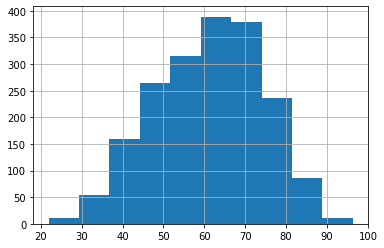

In [46]:
df.age_at_diagnosis.hist()

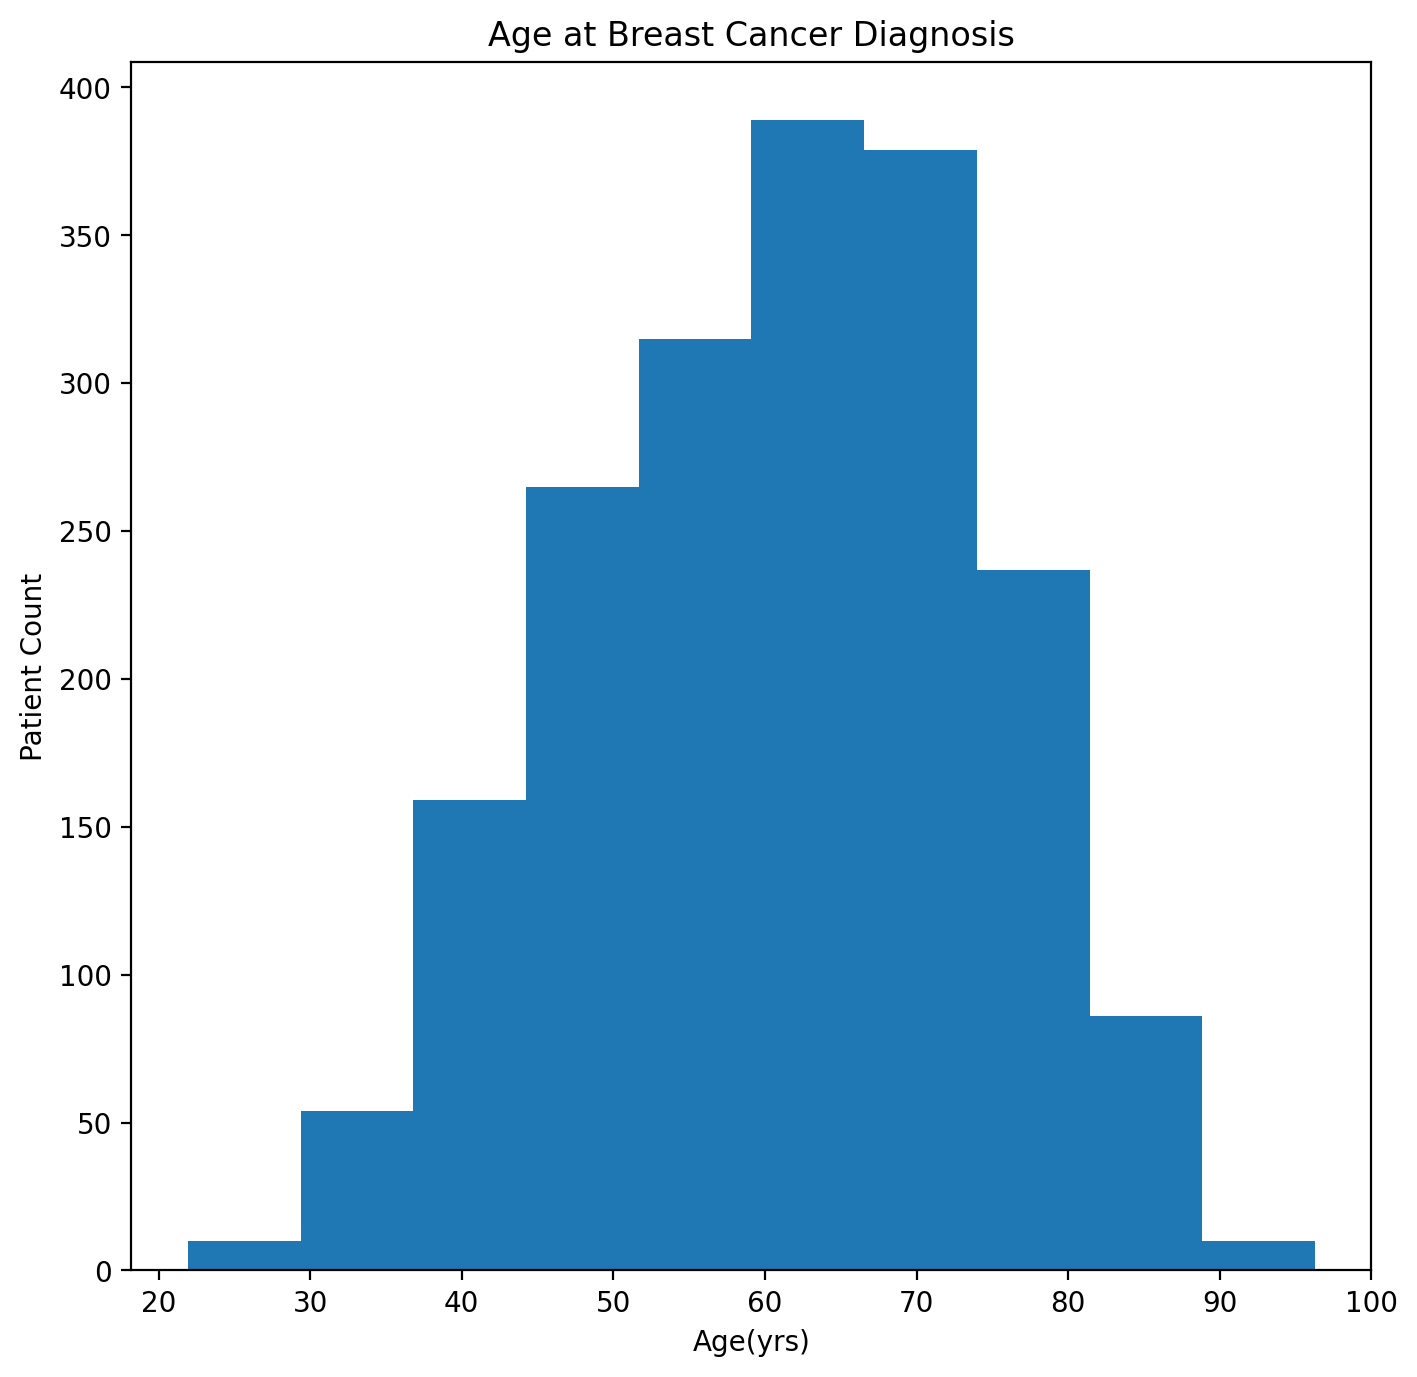

In [64]:
fig, ax = plt.subplots(figsize = (8,8),dpi =200)#figsize = (8,8,),dpi =200
ax.hist(df.age_at_diagnosis)
ax.set_title('Age at Breast Cancer Diagnosis')
ax.set_xlabel('Age(yrs)')
ax.set_ylabel('Patient Count')
plt.savefig("full_age_at_diagnosis_time.png")

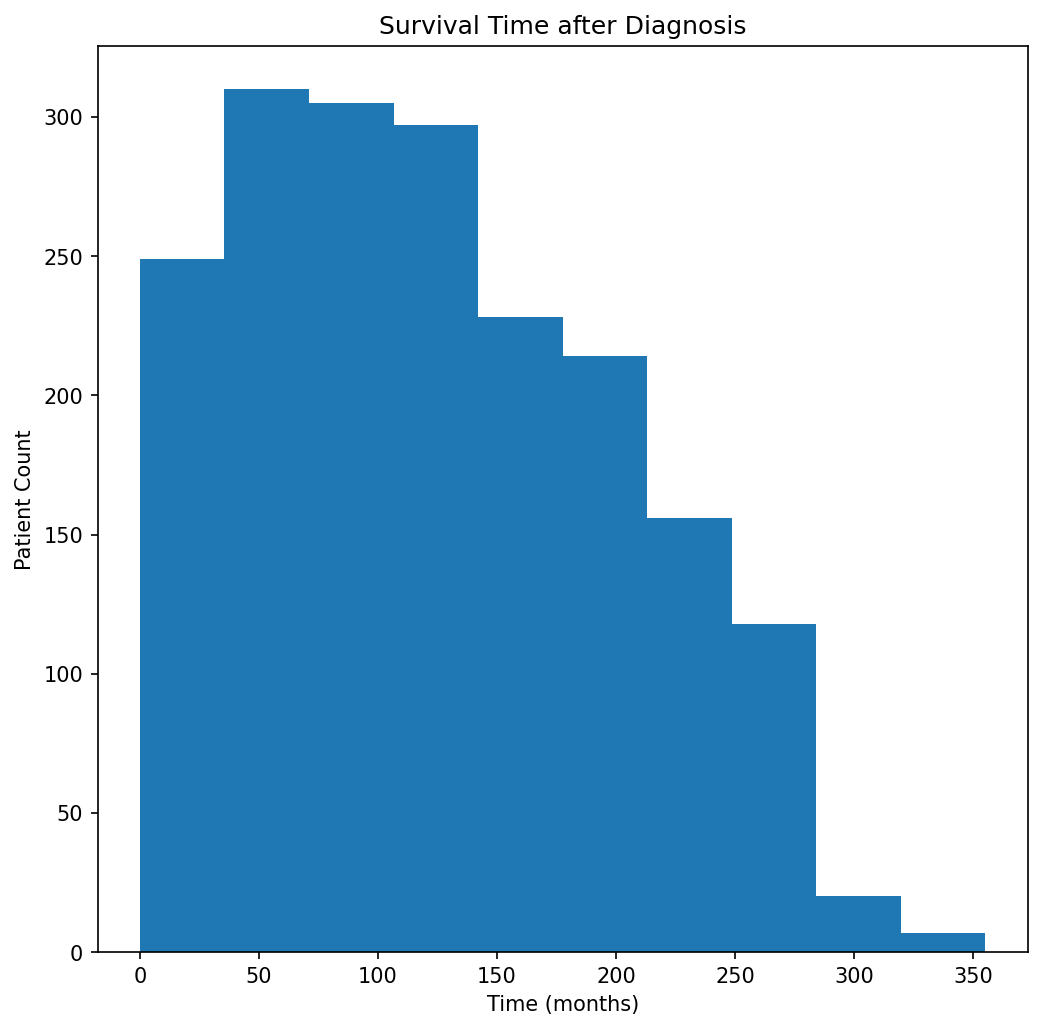

In [63]:
fig, ax = plt.subplots(figsize = (8,8), dpi = 150)#figsize = (8,8,),dpi =200
ax.hist(df.overall_survival_months)
ax.set_title('Survival Time after Diagnosis')
ax.set_xlabel('Time (months)')
ax.set_ylabel('Patient Count')

# plt.savefig("full_survival_time.png", dpi=200)

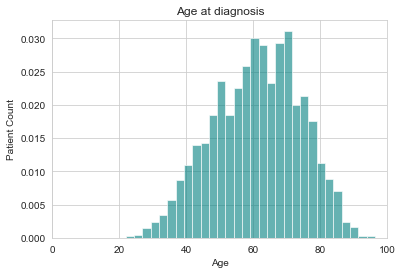

In [172]:


ax = df["age_at_diagnosis"].hist(bins=30, density=True, stacked=True, color='teal', alpha=0.6)
# df["age_at_diagnosis"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
ax.set_title('Age at diagnosis')
ax.plot(figsize = (12,12))
ax.set_ylabel('Patient Count')
plt.xlim(0)
plt.savefig("../images/age_at_diagnosis_density.png")
plt.show()

In [84]:
df

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0              0             75.65             MASTECTOMY  Breast Cancer   
1              2             43.19      BREAST CONSERVING  Breast Cancer   
2              5             48.87             MASTECTOMY  Breast Cancer   
3              6             47.68             MASTECTOMY  Breast Cancer   
4              8             76.97             MASTECTOMY  Breast Cancer   
...          ...               ...                    ...            ...   
1899        7295             43.10      BREAST CONSERVING  Breast Cancer   
1900        7296             42.88             MASTECTOMY  Breast Cancer   
1901        7297             62.90             MASTECTOMY  Breast Cancer   
1902        7298             61.16             MASTECTOMY  Breast Cancer   
1903        7299             60.02      BREAST CONSERVING  Breast Cancer   

                           cancer_type_detailed cellularity  chemotherapy  \
0              Breast Invasive Ductal Carcinoma         NaN             0   
1              Breast Invasive Ductal Carcinoma        High             0   
2              Breast Invasive Ductal Carcinoma        High             1   
3     Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4     Breast Mixed Ductal and Lobular Carcinoma        High             1   
...                                         ...         ...           ...   
1899          Breast Invasive Lobular Carcinoma        High             0   
1900           Breast Invasive Ductal Carcinoma        High             0   
1901           Breast Invasive Ductal Carcinoma        High             0   
1902           Breast Invasive Ductal Carcinoma    Moderate             0   
1903           Breast Invasive Ductal Carcinoma        High             0   

     pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
0                    claudin-low     1.0                   Positve  ...   
1                           LumA     1.0                   Positve  ...   
2                           LumB     1.0                   Positve  ...   
3                           LumB     1.0                   Positve  ...   
4                           LumB     1.0                   Positve  ...   
...                          ...     ...                       ...  ...   
1899                        LumA     4.0                   Positve  ...   
1900                        LumB     4.0                   Positve  ...   
1901                        LumB     4.0                   Positve  ...   
1902                        LumB     4.0                   Positve  ...   
1903                        LumB     4.0                   Positve  ...   

     mtap_mut  ppp2cb_mut smarcd1_mut nras_mut ndfip1_mut  hras_mut prps2_mut  \
0           0           0           0        0          0         0         0   
1           0           0           0        0          0         0         0   
2           0           0           0        0          0         0         0   
3           0           0           0        0          0         0         0   
4           0           0           0        0          0         0         0   
...       ...         ...         ...      ...        ...       ...       ...   
1899        0           0           0        0          0         0         0   
1900        0           0           0        0          0         0         0   
1901        0           0           0        0          0         0         0   
1902        0           0           0        0          0         0         0   
1903        0           0           0        0          0         0         0   

     smarcb1_mut stmn2_mut  siah1_mut  
0              0         0          0  
1              0         0          0  
2              0         0          0  
3              0         0          0  
4              0         0          0  
...          ...       ...        ...  
1899          

In [86]:
df.mutation_count.value_counts()

5.0     268
4.0     248
6.0     232
3.0     229
2.0     193
7.0     168
8.0     121
1.0     107
9.0      90
10.0     61
11.0     38
12.0     25
13.0     17
14.0     16
15.0     11
16.0      8
17.0      5
22.0      4
20.0      4
19.0      2
23.0      2
18.0      2
21.0      1
28.0      1
26.0      1
24.0      1
40.0      1
46.0      1
30.0      1
80.0      1
Name: mutation_count, dtype: int64

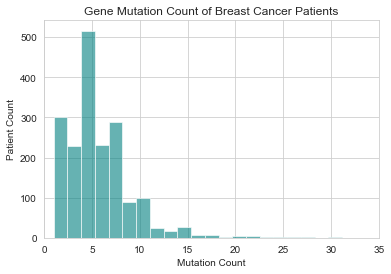

In [169]:
# df.mutation_count.hist()
# fig, ax = plt.subplots(figsize = (8,8), dpi = 150)#figsize = (8,8,),dpi =200
# ax.hist(df.mutation_count)
# ax.set_title('Survival Time after Diagnosis')
# ax.set_xlabel('Time (months)')
# ax.set_ylabel('Patient Count')

# plt.savefig("full_survival_time.png", dpi=200)





ax = df["mutation_count"].hist(bins=55,  stacked=True, color='teal', alpha=0.6)
# df["mutation_count"].plot(kind='density', color='teal')
ax.set(xlabel='Mutation Count')
ax.set_title('Gene Mutation Count of Breast Cancer Patients')
ax.plot(figsize = (12,12))
ax.set_ylabel('Patient Count')
plt.xlim(0, 35)
plt.savefig("Mutation_count.png")
plt.show()

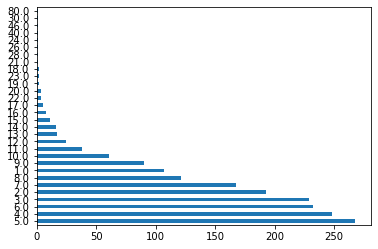

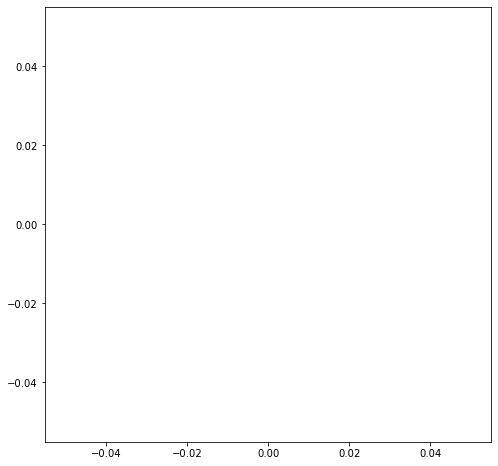

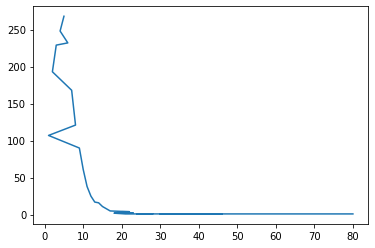

In [98]:
df.mutation_count.value_counts().plot(kind = 'barh')

fig, ax = plt.subplots(figsize = (8,8))
ax.plot()


fig, ax = plt.subplots()

ax.plot(df.mutation_count.value_counts())

# ax.set_title('some stuff')
# ax.set_xlabel('horizontal axis')
# ax.set_ylabel('vertical axis')
# ax

In [106]:
mrna_df =pd.read_csv('/Users/cp/Documents/dsi/capstone2/capstone2/data/capstone2.mrn_df2.csv')

In [109]:
death_from_dict = {
    'Living':0
    ,'Died of Other Causes':0
    ,'Died of Disease':1
}
df.replace(death_from_dict, inplace =True)
mrna_df['death_from_cancer'] = df.death_from_cancer

In [110]:
mrna_df.death_from_cancer.fillna(0, inplace = True)

In [111]:
y = mrna_df.pop('death_from_cancer')
X = mrna_df

In [116]:
from sklearn.model_selection import KFold, train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=1, stratify = y)
X_train2, X_test, y_train2, y_test = train_test_split(X_train.copy(), y_train.copy(), test_size=0.10, random_state=1)

In [118]:
from sklearn.cluster import KMeans
sumofsq = {}
for k in range(1,15):
    km = KMeans(n_clusters=k,init='k-means++',max_iter=1000)
    km = km.fit(X_train2)
    sumofsq[k] = km.inertia_

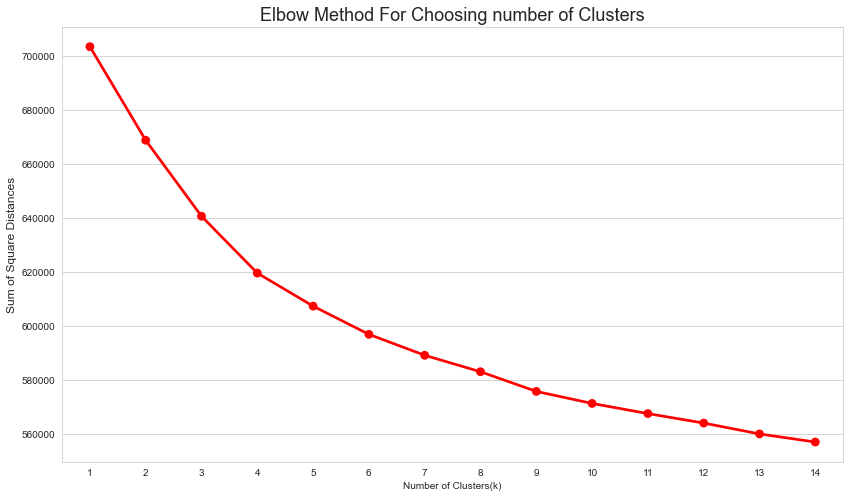

In [137]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(14,8))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances', fontsize = 12)
plt.title('Elbow Method For Choosing number of Clusters',fontsize = 18)
sns.pointplot(x=list(sumofsq.keys()),y=list(sumofsq.values()),color='red')
plt.savefig("Cluster_elbow.png", dpi=200)
plt.show()

In [120]:
kmeansmodel = KMeans(n_clusters=3, init= 'k-means++', max_iter= 1000)
kmeansmodel.fit_transform(X_train2)

array([[28.65448387, 31.23519012, 33.64452769],
       [20.41295419, 25.31840024, 24.94143126],
       [23.12028565, 19.87491865, 20.60229807],
       ...,
       [23.25401172, 21.87045273, 21.48043978],
       [22.39470837, 21.42851927, 22.30005888],
       [23.8090239 , 20.31145308, 20.27001257]])

In [122]:
Kmeansdf = X_train2.copy()
Kmeansdf['Cluster_by_KMeans'] = kmeansmodel.labels_

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer

In [131]:
n_components=50
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train2)

In [132]:
X_pcadf = pd.DataFrame(X_pca)
X_pcadf.columns =['PC'+str(i) for i in range(1,n_components+1)]

# Xpcadf['Patient Category'] = patients
print(f"Percent of explained variance with {n_components} Components : ", round(pca.explained_variance_ratio_.sum()*100,2))
X_pcadf.head()

Percent of explained variance with 50 Components :  57.05


PC1        PC2       PC3        PC4       PC5       PC6       PC7  \
0   7.948284  12.226199  1.397768  -0.784727 -1.913156  1.111652  0.645326   
1   0.630861  10.937660 -4.365334  -1.669493  4.462937 -2.524558 -5.190500   
2  -1.160193  -2.235092  7.483162   4.349142  2.653668 -1.135340 -2.391430   
3  16.082910   1.603723  2.764247  12.429927 -4.291427  2.450074  6.417834   
4  -7.429490   2.502156  3.134318   4.359246 -7.764583 -3.174651 -0.754660   

        PC8       PC9      PC10  ...      PC41      PC42      PC43      PC44  \
0 -9.352849 -1.535408 -2.373541  ... -1.843417 -1.056743 -3.322778  1.577329   
1 -0.462395  0.788911 -1.033457  ... -0.676515  0.960325 -2.529197  1.773100   
2  0.888128  2.176122 -3.013022  ...  0.612675 -2.530576  1.724946 -0.313786   
3  3.010041 -1.999868  4.794055  ... -1.478602  1.638485 -0.526790 -1.002708   
4  2.382797  1.432248 -1.394946  ... -0.077987  1.218510  1.968110 -1.409910   

       PC45      PC46      PC47      PC48      PC49      PC50  
0 -0.417842 -0.779598 -2.328468  3.105811 -1.304958 -0.655264  
1 -1.510648  1.481673 -0.782389  2.237438 -0.329962  0.219858  
2 -0.582820 -0.702910  1.528960  0.408357 -2.688189 -0.175726  
3  0.304274  0.550883 -3.672663 -0.778652  1.826420 -1.324768  
4 -1.010442  1.019404 -0.406147 -0.267279 -1.061226  0.208447  

[5 rows x 50 columns]

In [133]:
X_pcadf['Kmeans_cluster'] = kmeansmodel.labels_

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


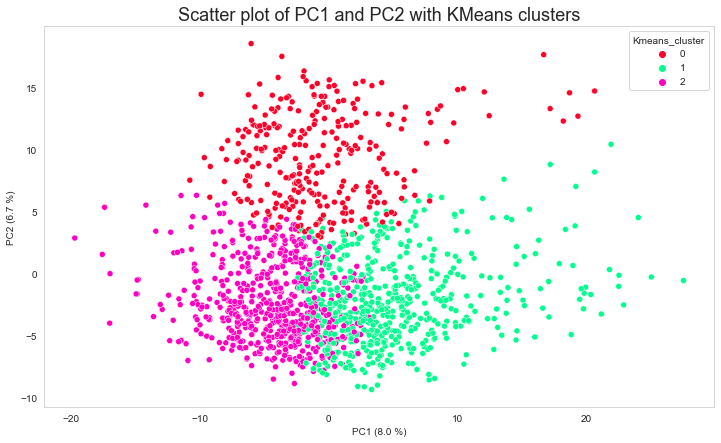

In [139]:
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")
ax = sns.scatterplot(X_pcadf['PC1'],X_pcadf['PC2'],hue=X_pcadf['Kmeans_cluster'],palette="gist_rainbow")

plt.xlabel(f'PC1 ({round(pca.explained_variance_ratio_[0] * 100,1)} %)')
plt.ylabel(f'PC2 ({round(pca.explained_variance_ratio_[1] * 100,1)} %)')
plt.title('Scatter plot of PC1 and PC2 with KMeans clusters',fontsize = 18 )
plt.grid()
plt.savefig("K-Means_cluster_n3.png")

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.07925648399804372


TypeError: '(slice(None, None, None), 0)' is an invalid key

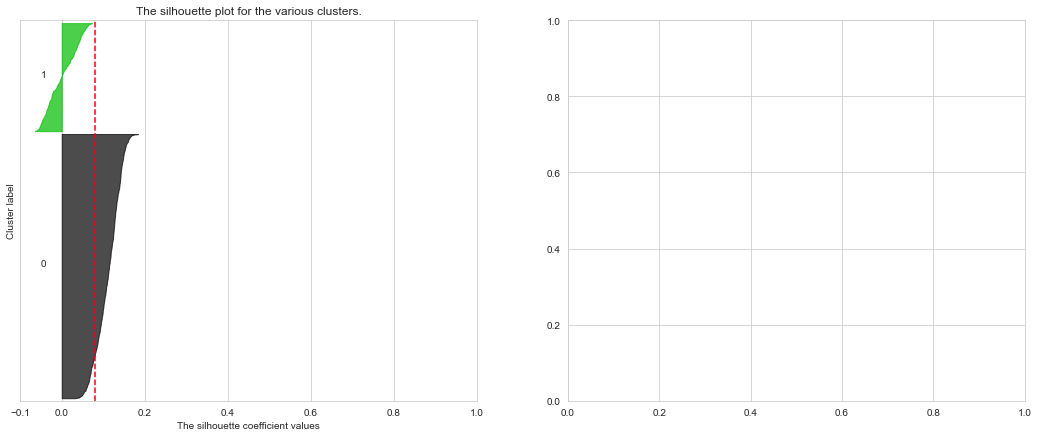

In [143]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
X = X_train2.copy()

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [153]:
from mpl_toolkits.mplot3d import Axes3D



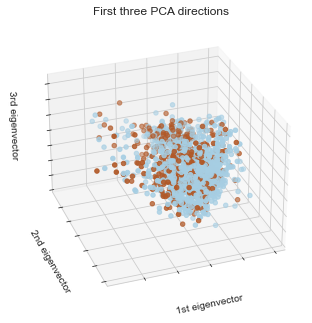

In [164]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
X_reduced  = sklearn_pca.fit_transform(X_train2)
Y=y_train2
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,cmap=plt.cm.Paired,linewidths=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.savefig("PCA_first_3_plt_blue_brown_version.png", dpi=200)

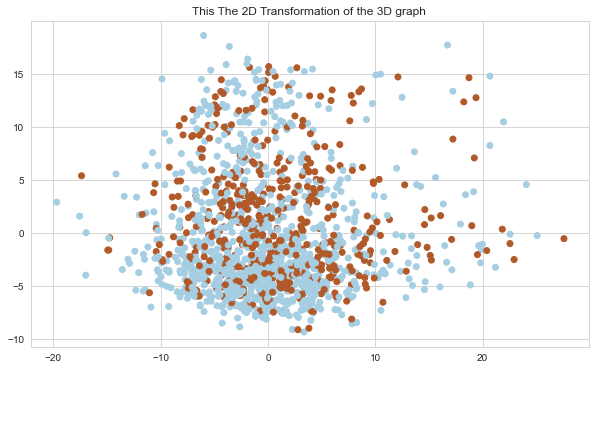

In [163]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(1, figsize=(10,6))
plt.scatter(X_reduced[:, 0],  X_reduced[:, 1], c=y_train2,cmap=plt.cm.Paired,linewidths=1)
plt.annotate('See The Brown Cluster',xy=(20,-20),xytext=(9,8),arrowprops=dict(facecolor='black', shrink=0.05))
#plt.scatter(test_reduced[:, 0],  test_reduced[:, 1],c='r')
plt.title("This The 2D Transformation of the 3D graph ")
plt.savefig("PCA_first_3_plt_blue_brown_version_2D.png", dpi=200)